In [1]:
import os
os.chdir(r"C:\Users\dell\Desktop\Github\Data mining")
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
'''******Importing the dataset *********************************************'''
df = pd.read_csv('ccpp.csv')
ccpp = df.copy(True)

#Details  of the Attributes
ccpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
#Details  of the Attributes
ccpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
#calculating some statistical data like percentile, mean and std of the numerical values

ccpp.describe()
df_ccpp=ccpp.describe().T
df_ccpp.to_html(r'ccppdescription.html')
ccpp.columns
ccpp.shape

(9568, 5)

In [5]:
ccpp.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

**As we dont have missing values we don't need to handle missing values and
our dataset does not contains categorical data so Encoding is not required**


<AxesSubplot:>

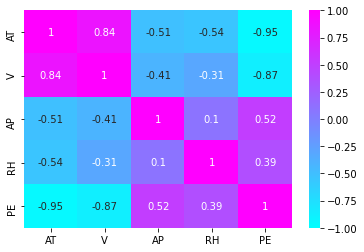

In [6]:
#******************* Correlation Matrix & Heat Map************************'''
import seaborn as sns

corr_ccpp=ccpp.corr()

sns.heatmap(corr_ccpp, vmin = -1, vmax = 1, annot = True, cmap= 'cool')


In [7]:
#***************** Initiating independent=X and Dependent=y Variables*****'''
X = ccpp.drop(['PE'], axis = 1)
y = ccpp.PE

In [8]:
#******* Splitting the dataset into the Training set and Test set**********'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:
#******************Backward Elimination with preparing X_train for adjusted R2'''
import statsmodels.api as sm
X1 = sm.add_constant(X_train) #are we doing this for adjusted r2?
ols = sm.OLS(y_train, X1)
lr = ols.fit()


In [10]:
#Displaying the P-Values
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.479e+04
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:15:45   Log-Likelihood:                -22495.
No. Observations:                7654   AIC:                         4.500e+04
Df Residuals:                    7649   BIC:                         4.503e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        449.5316     10.988     40.912      0.0

**As p values of all varaible are less than significance value so 
we don't need to drop any variable except constant'''**

In [11]:
X_train = X1.drop('const', axis=1)
X_train

X_train.columns


Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [12]:
#'''*****# Training the Linear Regression model on the Training set*****'''
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#************# Predicting the Test set results****************************'''
y_pred = regressor.predict(X_test)

y_pred1 = pd.DataFrame(regressor.predict(X_test))
y1 = y_pred1.to_numpy()
np.set_printoptions(precision=2)
y2= y_test.to_numpy()
np.set_printoptions(precision=2)
print(np.concatenate((y1.reshape(len(y1),1),y2.reshape(len(y2),1)),1))


[[433.36 426.18]
 [448.39 451.1 ]
 [445.89 442.87]
 ...
 [456.06 454.2 ]
 [446.91 444.13]
 [432.57 436.58]]


In [14]:
#'''*************Evaluating the Model Performance****************************'''
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.929899469443679

In [15]:
#'****************Finding the value of Intercept & Cofficient for all X Variables'''
print(regressor.intercept_)
print(regressor.coef_)

regressor.intercept_
regressor.coef_

449.5316269983783
[-1.98 -0.23  0.07 -0.16]


array([-1.98, -0.23,  0.07, -0.16])

In [16]:
#''************ Mean Absolute Error and Mean Squared Error********************'''
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs_error = mean_absolute_error(y_test,y_pred)
mean_abs_error

mean_sq_error = mean_squared_error(y_test,y_pred)
mean_sq_error


20.218249777037887

In [17]:
#''*********************Finding R-Square ***********************************'''
R2_test = regressor.score(X_test,y_test)
R2_test


0.929899469443679

In [18]:
#'''*********************K-FOLD ***********************************'''
from sklearn.model_selection import cross_val_score
cross_val_score(regressor,X,y,cv=4) 


array([0.93, 0.92, 0.93, 0.93])

In [19]:

# Cheking mean value of the scores of k-fold
cross_val_score(regressor,X,y,cv=4).mean()


0.9284917507488122

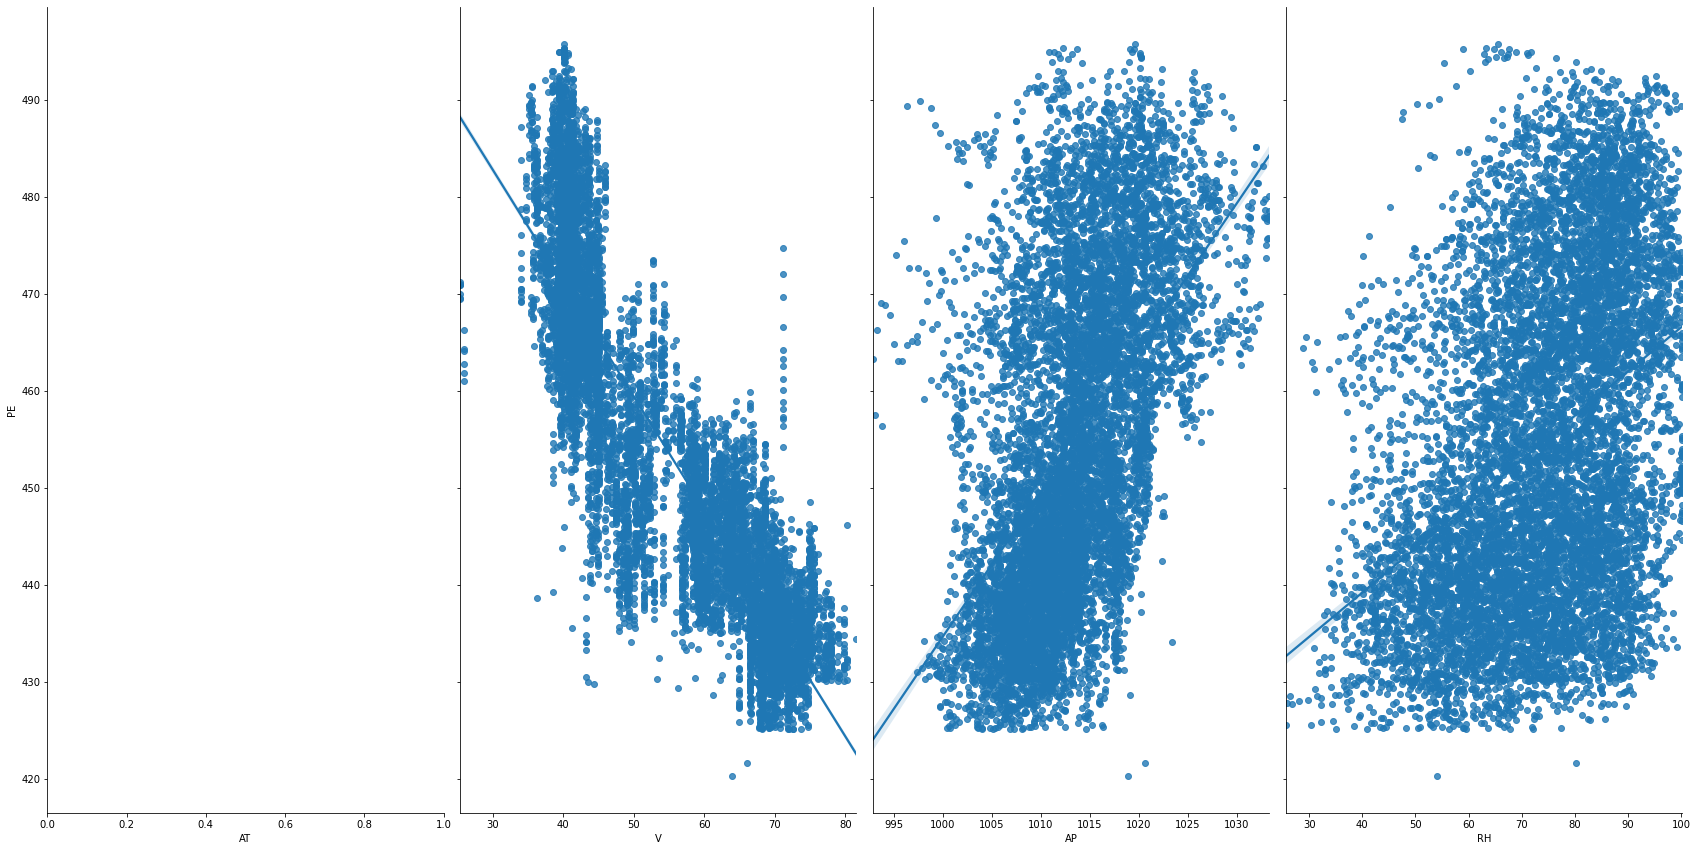

In [20]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(ccpp, x_vars=['AT','V','AP','RH'], y_vars='PE', size=12, aspect=0.5,kind='reg')

# <center>Thank You...